In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

## 1.Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


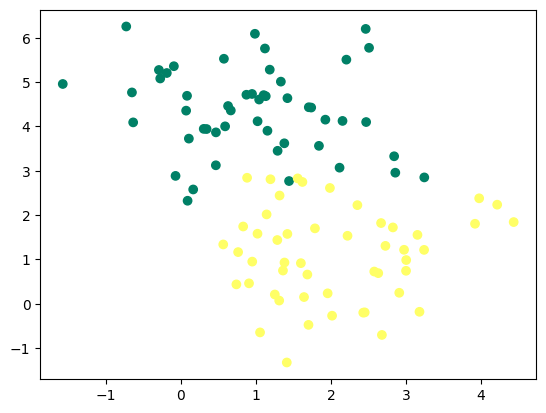

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer') #plot individual data points as dots on a 2D graph to visualize the relationship between the two variables.
plt.show()

In [3]:
def initialisation(X):
    W= np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return(W,b)

    

In [4]:
def model(X,W,b):
    Z=X.dot(W) +b
    A=1/(1 + np.exp(-Z))
    return A

In [5]:
def log_loss(A,y):
    return (1/len(y))*np.sum(-y *np.log(A)-(1-y)*np.log(1-A))


In [6]:
def gradients (A,X,y):
    dw=1/len (y) *np.dot(X.T, A-y)
    db=1/len(y)*np.sum(A-y)
    return(dw,db)

In [7]:
def update(dw,db,W,b, learning_rate):
    W=W-learning_rate*dw
    b=b-learning_rate*db
    return(W,b)

In [8]:
def predict(X,W,b):
    A=model(X,W,b)
    return A  >= 0.5

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
def artificial_neuron(X,y,learning_rate=0.1, n_iter=100):
    #initialiser w et b
    W,b=initialisation(X)
    loss=[]
    for i in range (n_iter):
        A=model(X,W,b)
        loss.append(log_loss(A,y))
        dw,db=gradients(A,X,y)
        W,b=update(dw,db,W,b,learning_rate)
    y_pred=predict(X,W,b)
    print (accuracy_score(y, y_pred))
    plt.plot(loss)
    plt.show()
    
    return(W,b)

0.89


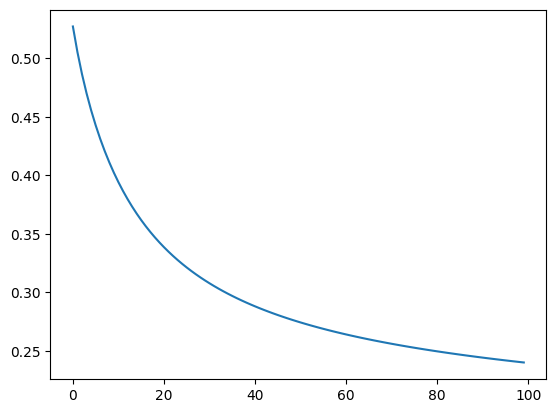

In [11]:
W,b=artificial_neuron(X,y)

## 3.frontière de décision

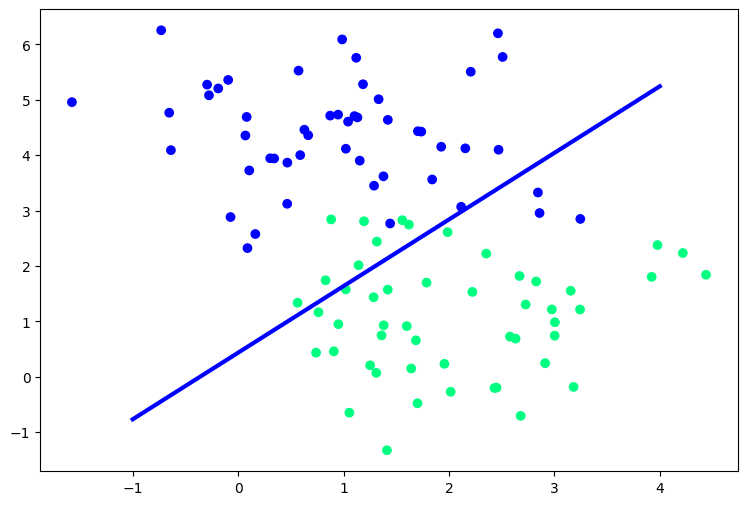

In [12]:
from numpy import linspace
fig, ax =plt.subplots(figsize=(9,6))
ax.scatter(X[:,0],X[:,1],c=y,cmap="winter")

x1= np.linspace(-1,4,100)
x2=(-W[0]*x1-b)/W[1]

ax.plot(x1,x2,c="blue",lw=3)